In [1]:
# import the necessary packages
import h5py
import numpy as np
import os
import glob
import cv2
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.externals import joblib

# create all the machine learning models
models = []
models.append(('LR', LogisticRegression(random_state=9)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=9)))
models.append(('RF', RandomForestClassifier(n_estimators=100, random_state=9)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(random_state=9)))

# variables to hold the results and names
results = []
names = []
scoring = "accuracy"

# import the feature vector and trained labels
h5f_x_train = h5py.File('x_train1.h5', 'r')
h5f_y_train = h5py.File('y_train1.h5', 'r')

h5f_x_test = h5py.File('x_test1.h5', 'r')
h5f_y_test = h5py.File('y_test1.h5', 'r')

global_features_string_train= h5f_x_train['dataset_1']
global_labels_string_train = h5f_y_train['dataset_1']

global_features_string_test = h5f_x_test['dataset_1']
global_labels_string_test = h5f_y_test['dataset_1']

print(global_features_string_train)
global_features_train = np.array(global_features_string_train)
global_labels_train = np.array(global_labels_string_train)
global_features_test = np.array(global_features_string_test)
global_labels_test = np.array(global_labels_string_test)

h5f_x_train.close()
h5f_y_train.close()
h5f_x_test.close()
h5f_x_test.close()

trainDataGlobal = global_features_train
testDataGlobal = global_features_test
trainLabelsGlobal = global_labels_train
testLabelsGlobal = global_labels_test
# split the training and testing data
#(trainDataGlobal, testDataGlobal, trainLabelsGlobal, testLabelsGlobal) = train_test_split(np.array(global_features),
#                                                                                          np.array(global_labels),
#                                                                                          test_size=test_size,
#                                                                                          random_state=seed)


print ("Train data  : {}".format(trainDataGlobal.shape))
print ("Test data   : {}".format(testDataGlobal.shape))
print ("Train labels: {}".format(trainLabelsGlobal.shape))
print ("Test labels : {}".format(testLabelsGlobal.shape))

# filter all the warnings
import warnings
warnings.filterwarnings('ignore')

# 10-fold cross validation
for name, model in models:
    #kfold = KFold(n_splits=10, random_state=42)
    #cv_results = cross_val_score(model, trainDataGlobal, trainLabelsGlobal, cv=kfold, scoring=scoring)
    names.append(name)
    model_temp = model.fit(trainDataGlobal,trainLabelsGlobal)
    model_score = model_temp.score(testDataGlobal, testLabelsGlobal)
    results.append(model_score)
    msg = "%s: %f" % (name, model_score)
    print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('ML algorithm Food Classification Comparison')
ax = fig.add_subplot(111)
pyplot.bar(names,results)
ax.set_xticklabels(names)
pyplot.show()

C:\Users\Ari Wibisono\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


<HDF5 dataset "dataset_1": shape (998, 532), type "<f8">
Train data  : (998, 532)
Test data   : (299, 532)
Train labels: (998,)
Test labels : (299,)
LR: 0.886288
LDA: 0.993311
KNN: 0.742475
CART: 0.989967
RF: 0.996656
NB: 0.966555
SVM: 0.200669


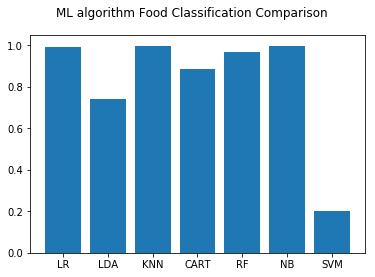

In [2]:
# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('ML algorithm Food Classification Comparison')
ax = fig.add_subplot(111)
pyplot.bar(names,results)
ax.set_xticklabels(names)
pyplot.show()